<p style="text-align: center;"> <span style="color:skyblue"> <font size="5"> <b> CNN Neural Network - Image Classification  </b> </font> </p> </span> 
<p style="text-align: center;"> <b> <font font size="4"> By: Kofi Buahin </p> </b></font>

## Library Imports  

In [140]:
import os
import pathlib
import pickle
import warnings
warnings.filterwarnings('ignore')


#Standard Data Science Libraries
import numpy as np
import pandas as pd

#Image Processing Relevant Tools
from PIL import Image, ImageOps
from IPython.display import display

# Machine Learning Relevant Tools
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns 
plt.style.use('ggplot')
rcParams['figure.figsize'] = (18, 6)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

## Data Pre-processing

In [141]:
dir = str(pathlib.Path().resolve())
image_classes = [folder for folder in os.listdir(dir+'/natural_images') ]
image_classes

['cat', 'dog', 'person']

We don't have images of the same size so we should rescale them. We do that using functions below

In [151]:
# Containers for Numpy Arrays of Image data.
from pandas import value_counts


y_labels = []
x_data = []
val_counts = {}

# Function to Process images
def ImageProcessor(img_path):
    img = Image.open(img_path)
    img = img.resize(size=(28, 28))
    img = np.asarray(img)/ 255.0
    return img

# def FolderProcessor(label):
def FolderProcessor(label,lst):
    folder = dir + '/natural_images/{}'.format(label) 
    processed = [] # Storage container for images
    for img in os.listdir(folder): # For every image in the directory
        pic_dir = folder + '/{}'.format(img)
        processed.append(ImageProcessor(pic_dir))
        y_labels.append(label)  # Add a class column
    lst.append(processed) # Convert to pd.DataFrame
    return processed

#### Experimentation

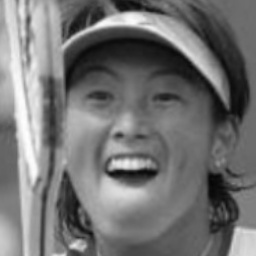

In [6]:

test = Image.open('natural_images/person/person_0123.jpg')
gray_test = ImageOps.grayscale(test)
display(gray_test)

In [ ]:
gray_resized_img = gray_test.resize(size=(28, 28))
display(gray_resized_img)

In [ ]:
np.asarray(gray_resized_img)

In [ ]:
# cv2.imread('natural_images/person/person_0123.jpg')
# cv2.resize(np.ravel(gray_resized_img),(28,28))

In [ ]:
cv2.imread
cv2.resize(np.ravel(gray_resized_img),(28,28))


#### Loading Data

We can now merge all the processed data into a single dataframe here:

In [ ]:
# data = pd.concat([FolderProcessor(c) for c in image_classes])
[FolderProcessor(c, x_data) for c in image_classes]

We must now split the dataset into test and train and we must also encode the target variable class

In [153]:
# y_vars = data['class']
# X_vars = data.iloc[:,:-1]

# y_encoded = LabelEncoder().fit_transform(y_vars)
# y_categorical = to_categorical(y_encoded)

X_vars = np.concatenate(x_data, axis=0)
y_vars = np.array(y_labels)
print('X Data Shape: {}'.format(X_vars.shape))
print('Y Data Shape: {}'.format(y_vars.shape))

y_encoded = LabelEncoder().fit_transform(y_vars)
y_categorical = to_categorical(y_encoded)

X Data Shape: (2573, 28, 28, 3)
Y Data Shape: (2573,)


In [154]:
del x_data

In [155]:
shuffle = np.arange(X_vars.shape[0])
np.random.seed(15)
np.random.shuffle(shuffle)
X = X_vars[shuffle]
# X = np.array(X_vars[shuffle])
y = y_categorical[shuffle]


In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y, 
                                                    test_size = 0.25)

## Exploratory Data Analysis (If Needed)

In [54]:
# class_dist = Counter(y_labels)
# class_dist = X_vars['class'].value_counts()

# fig, ax = plt.subplots()

# p = plt.barh(class_dist.index, class_dist)
# ax.set_xlabel('Class')
# ax.set_ylabel('Count of Images')
# ax.set_title('Number Pictures in Dataset by Class')

# bar_labels = class_dist # series of label
# [ax.text(v, i, v) for i, v in enumerate(bar_labels)]

# plt.title("Number Pictures in Dataset by Class", 
#           loc= 'center',
#           fontsize = 20,
#           fontweight = 'bold',
#           pad = 20, 
#           color = 'black')

# plt.show()

***Show some random pictures selected from the training set***

In [157]:
X_train.shape[1:]

(28, 28, 3)

## Model Building

### Iteration 1 - MLP Classifier

In [158]:
tf.random.set_seed(15)

mlp_nn = tf.keras.Sequential()
mlp_nn.add(layers.Flatten(input_shape=X_train.shape[1:]))
mlp_nn.add(layers.Dense(2048, activation='relu'))
mlp_nn.add(layers.Dense(1024, activation='relu'))
mlp_nn.add(layers.Dense(1024, activation='relu'))
mlp_nn.add(layers.Dropout(rate=0.25))
mlp_nn.add(layers.Dense(128, activation='relu'))
mlp_nn.add(layers.Dense(3, activation='softmax'))


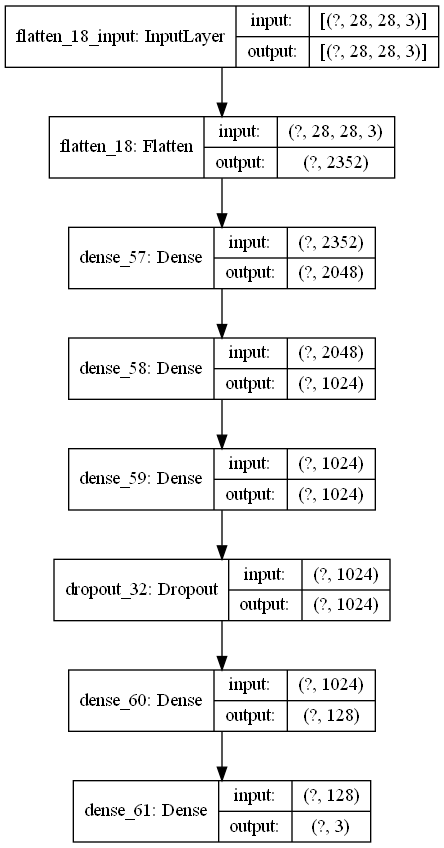

In [160]:
plot_model(mlp_nn, show_shapes = True,expand_nested = True)
# plot_model(mlp_nn)

In [162]:
mlp_nn.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history_mlp = mlp_nn.fit(
    X_train,
    y_train,
    epochs=50,
    # batch_size=128,
    validation_split= 0.2,
    callbacks = early_stopping_cb
)

Epoch 1/50
49/49 [==============================] - 4s 90ms/step - loss: 1.2479 - accuracy: 0.6498 - val_loss: 0.9717 - val_accuracy: 0.6718
Epoch 2/50
49/49 [==============================] - 4s 75ms/step - loss: 0.7406 - accuracy: 0.7509 - val_loss: 0.6034 - val_accuracy: 0.7910
Epoch 3/50
49/49 [==============================] - 4s 73ms/step - loss: 0.5927 - accuracy: 0.7885 - val_loss: 0.6795 - val_accuracy: 0.7755
Epoch 4/50
49/49 [==============================] - 4s 78ms/step - loss: 0.5352 - accuracy: 0.8002 - val_loss: 0.4733 - val_accuracy: 0.8256
Epoch 5/50
49/49 [==============================] - 4s 73ms/step - loss: 0.6018 - accuracy: 0.7855 - val_loss: 0.5031 - val_accuracy: 0.8152: 0.6224 - accu - ETA: 0s - loss: 0.6133 - accuracy: 0.78 - ETA: 0s - loss: 0.6106 - accuracy
Epoch 6/50
49/49 [==============================] - 4s 72ms/step - loss: 0.5154 - accuracy: 0.8090 - val_loss: 0.4869 - val_accuracy: 0.8256
Epoch 7/50
49/49 [==============================] - 4s 73ms/s

In [163]:
mlp_nn.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 2352)              0         
_________________________________________________________________
dense_57 (Dense)             (None, 2048)              4818944   
_________________________________________________________________
dense_58 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_59 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_32 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_60 (Dense)             (None, 128)               131200    
_________________________________________________________________
dense_61 (Dense)             (None, 3)               

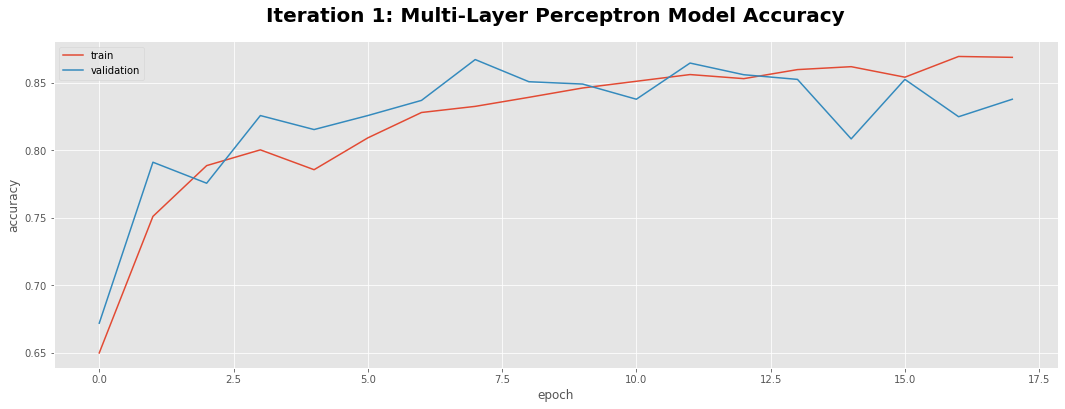

In [164]:
plt.plot(history_mlp.history['accuracy'])
plt.plot(history_mlp.history['val_accuracy'])
plt.title("Iteration 1: Multi-Layer Perceptron Model Accuracy", 
          loc= 'center',
          fontsize = 20,
          fontweight = 'bold',
          pad = 20, 
          color = 'black')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


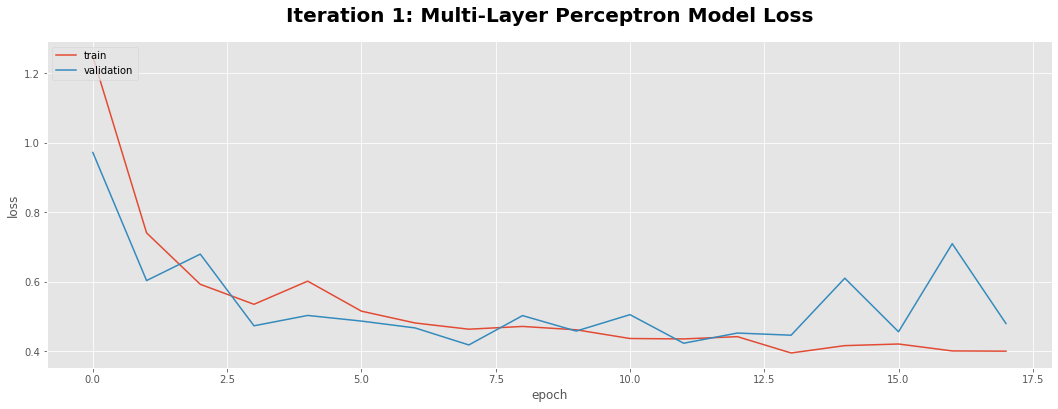

In [165]:
plt.plot(history_mlp.history['loss'])
plt.plot(history_mlp.history['val_loss'])
plt.title("Iteration 1: Multi-Layer Perceptron Model Loss", 
          loc= 'center',
          fontsize = 20,
          fontweight = 'bold',
          pad = 20, 
          color = 'black')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [166]:
loss, accuracy = mlp_nn.evaluate(X_test, y_test)
print('Loss: ', loss)
print('Accuracy: ', accuracy)


21/21 [==============================] - 0s 17ms/step - loss: 0.4609 - accuracy: 0.8328
Loss:  0.460854172706604
Accuracy:  0.8328157067298889


In [167]:
y_pred = np.argmax(mlp_nn.predict(X_test), axis=1)
y_test2 = np.argmax(y_test, axis = 1)
round(accuracy_score(y_pred,y_test2),4)

0.7453

In [168]:
y_pred = np.argmax(mlp_nn.predict(X_test), axis=1)
y_test2 = np.argmax(y_test, axis = 1)
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.85      0.71       221
           1       0.61      0.29      0.39       176
           2       0.97      0.98      0.97       247

    accuracy                           0.75       644
   macro avg       0.73      0.71      0.69       644
weighted avg       0.74      0.75      0.72       644



We can see the performance (precision) on the human images is significantly better on people faces versus dogs and cats....

elaborate more here

In [175]:
X_train.shape[1:]

(28, 28, 3)

### Iteration 2 - Basic Custom CNN Network Architecture

In [180]:
CNN_basic = keras.models.Sequential([
    keras.layers.Conv2D(64, 5, activation="relu",input_shape=X_train.shape[1:], padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu",padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation="softmax")
])

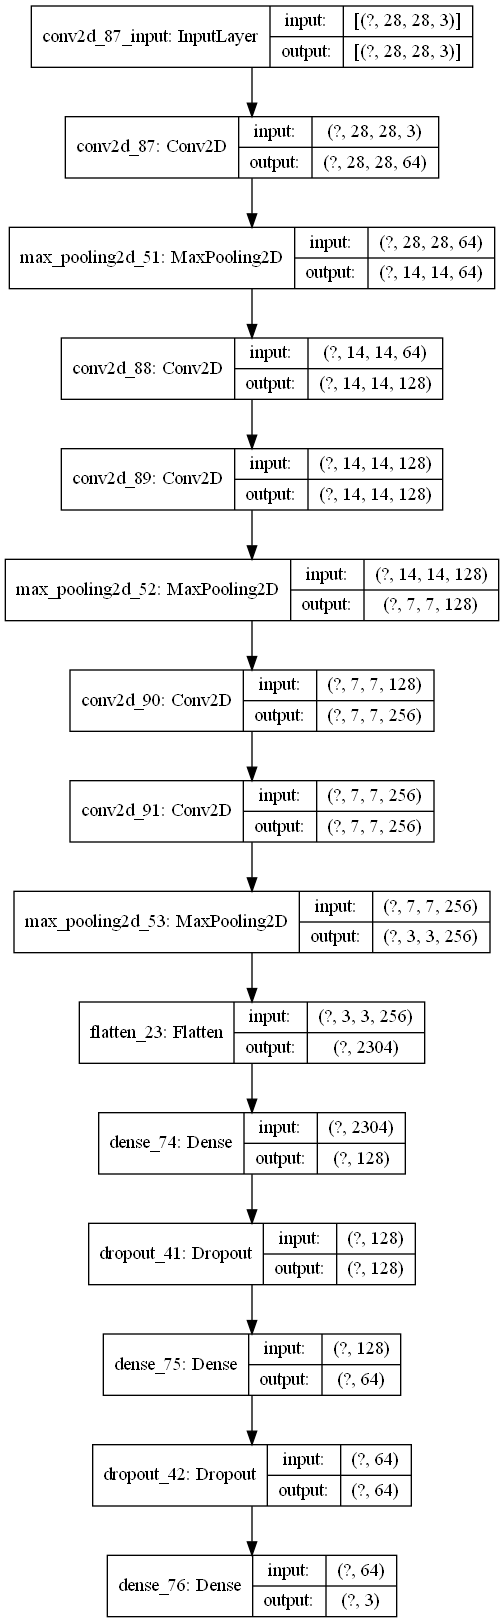

In [182]:
plot_model(CNN_basic, show_shapes = True,expand_nested = True)
# plot_model(CNN_basic)

In [183]:
CNN_basic.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

In [184]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history_CNNbasic = CNN_basic.fit(
    X_train,
    y_train,
    epochs=50,
    # batch_size=128,
    validation_split= 0.2,
    callbacks = early_stopping_cb
)

Epoch 1/50
49/49 [==============================] - 16s 321ms/step - loss: 1.0997 - accuracy: 0.6641 - val_loss: 1.0901 - val_accuracy: 0.6667
Epoch 2/50
49/49 [==============================] - 18s 371ms/step - loss: 1.0862 - accuracy: 0.6690 - val_loss: 1.0897 - val_accuracy: 0.6667
Epoch 3/50
49/49 [==============================] - 21s 435ms/step - loss: 1.0937 - accuracy: 0.6667 - val_loss: 1.0849 - val_accuracy: 0.6667
Epoch 4/50
49/49 [==============================] - 24s 482ms/step - loss: 1.0895 - accuracy: 0.6667 - val_loss: 1.0828 - val_accuracy: 0.6667
Epoch 5/50
49/49 [==============================] - 26s 523ms/step - loss: 1.0937 - accuracy: 0.6665 - val_loss: 1.0830 - val_accuracy: 0.6667
Epoch 6/50
49/49 [==============================] - 21s 437ms/step - loss: 1.0895 - accuracy: 0.6662 - val_loss: 1.0855 - val_accuracy: 0.6667
Epoch 7/50
49/49 [==============================] - 32s 663ms/step - loss: 1.0933 - accuracy: 0.6667 - val_loss: 1.0839 - val_accuracy: 0.6667

In [185]:
CNN_basic.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_87 (Conv2D)           (None, 28, 28, 64)        4864      
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 7, 7, 256)       

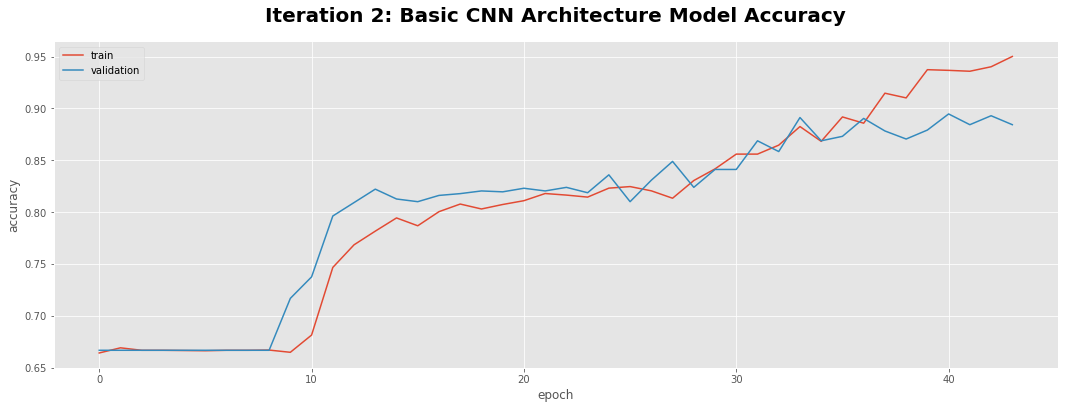

In [186]:
plt.plot(history_CNNbasic.history['accuracy'])
plt.plot(history_CNNbasic.history['val_accuracy'])
plt.title("Iteration 2: Basic CNN Architecture Model Accuracy", 
          loc= 'center',
          fontsize = 20,
          fontweight = 'bold',
          pad = 20, 
          color = 'black')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

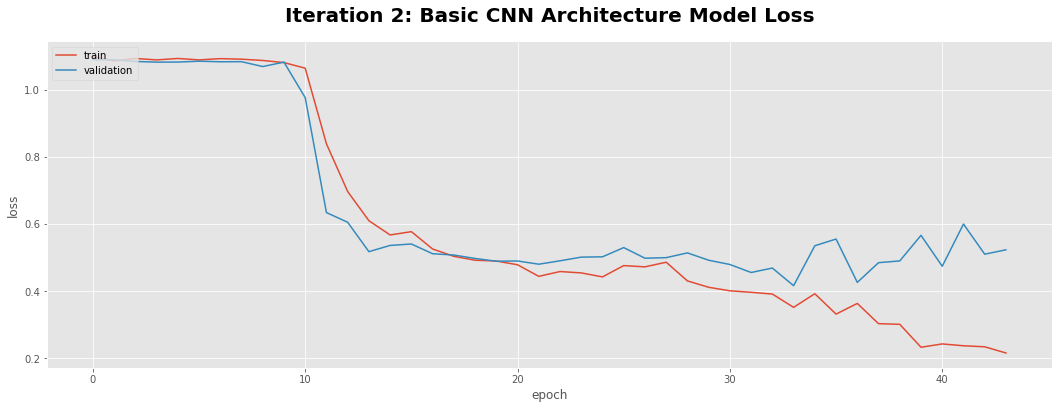

In [187]:
plt.plot(history_CNNbasic.history['loss'])
plt.plot(history_CNNbasic.history['val_loss'])
plt.title("Iteration 2: Basic CNN Architecture Model Loss", 
          loc= 'center',
          fontsize = 20,
          fontweight = 'bold',
          pad = 20, 
          color = 'black')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [188]:
loss, accuracy = CNN_basic.evaluate(X_test, y_test)
print('Loss: ', loss)
print('Accuracy: ', accuracy)


21/21 [==============================] - 1s 63ms/step - loss: 0.4133 - accuracy: 0.8571
Loss:  0.4133046865463257
Accuracy:  0.8571429252624512


In [189]:
y_pred = np.argmax(CNN_basic.predict(X_test), axis=1)
y_test2 = np.argmax(y_test, axis = 1)
round(accuracy_score(y_pred,y_test2),4)

0.7842

In [190]:
# y_pred = np.argmax(mlp_nn.predict(X_test), axis=1)
# y_test2 = np.argmax(y_test, axis = 1)
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.81      0.73       221
           1       0.67      0.46      0.55       176
           2       0.97      0.99      0.98       247

    accuracy                           0.78       644
   macro avg       0.77      0.75      0.75       644
weighted avg       0.78      0.78      0.78       644



### Iteration 3 - Implementing Recreation of a Popular Architecture (LeNet-5 CNN)

In [191]:
LeNet_5 = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, activation="tanh", input_shape=X_train.shape[1:], strides=1, padding="same"), #C1 Layer 
    keras.layers.AveragePooling2D(strides=2),                                                                           #S2 Layer
    keras.layers.Conv2D(16, kernel_size=5, activation="tanh", strides=1, padding="same"),                               #C3 Layer
    keras.layers.AveragePooling2D(strides=2),                                                                           #S4 Layer
    keras.layers.Conv2D(120, kernel_size=5, activation="tanh", strides=1, padding="same"),                              #C5 Layer
    keras.layers.Dense(84, activation="tanh"),                                                                          #F6 Layer
    keras.layers.Flatten(),                                                                                             #Flatten 
    keras.layers.Dense(3, activation="softmax")                                                                         #Output Layer
])

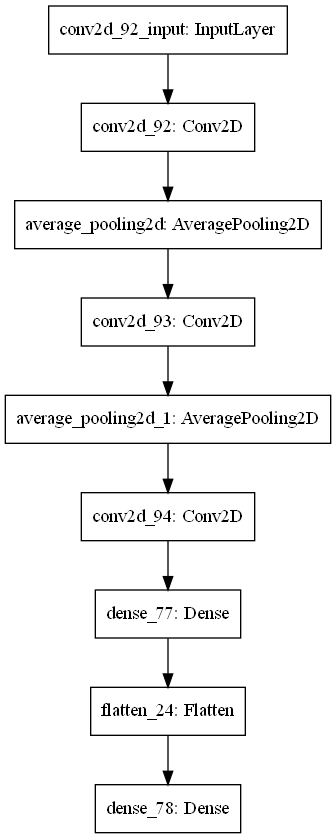

In [192]:
# plot_model(LeNet_5, show_shapes = True,expand_nested = True)
plot_model(LeNet_5)


In [193]:
LeNet_5.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

In [194]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history_LeNet5 = LeNet_5.fit(
    X_train,
    y_train,
    epochs=50,
    # batch_size=128,
    validation_split= 0.2
    # callbacks = early_stopping_cb
)

Epoch 1/50
49/49 [==============================] - 2s 43ms/step - loss: 0.7334 - accuracy: 0.7654 - val_loss: 0.5884 - val_accuracy: 0.7910
Epoch 2/50
49/49 [==============================] - 2s 35ms/step - loss: 0.5591 - accuracy: 0.8105 - val_loss: 0.5104 - val_accuracy: 0.8247
Epoch 3/50
49/49 [==============================] - 2s 34ms/step - loss: 0.5287 - accuracy: 0.8170 - val_loss: 0.4686 - val_accuracy: 0.8515
Epoch 4/50
49/49 [==============================] - 2s 35ms/step - loss: 0.4856 - accuracy: 0.8267 - val_loss: 0.4506 - val_accuracy: 0.8446
Epoch 5/50
49/49 [==============================] - 2s 37ms/step - loss: 0.4784 - accuracy: 0.8399 - val_loss: 0.4624 - val_accuracy: 0.8437
Epoch 6/50
49/49 [==============================] - 2s 34ms/step - loss: 0.4744 - accuracy: 0.8412 - val_loss: 0.4422 - val_accuracy: 0.8610
Epoch 7/50
49/49 [==============================] - 2s 38ms/step - loss: 0.4545 - accuracy: 0.8477 - val_loss: 0.4471 - val_accuracy: 0.8566
Epoch 8/50
49

In [195]:
LeNet_5.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_92 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 14, 14, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 7, 7, 120)         48120     
_________________________________________________________________
dense_77 (Dense)             (None, 7, 7, 84)          10164     
_________________________________________________________________
flatten_24 (Flatten)         (None, 4116)            

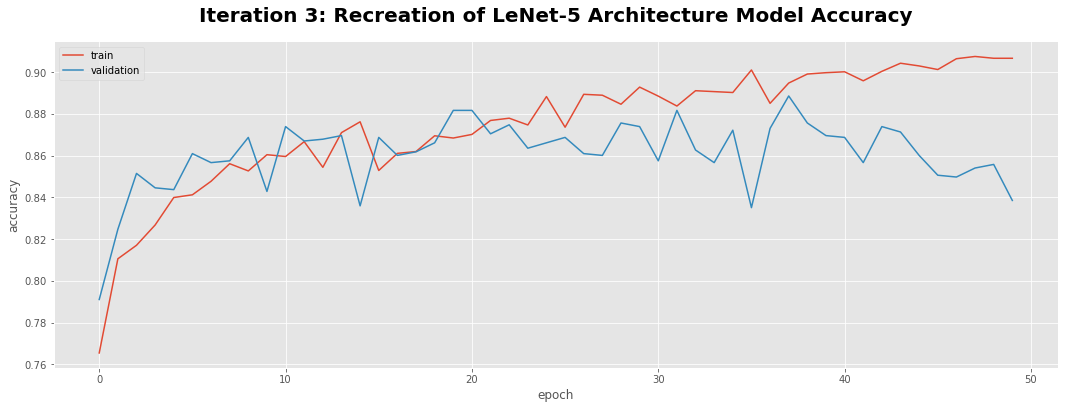

In [196]:
plt.plot(history_LeNet5.history['accuracy'])
plt.plot(history_LeNet5.history['val_accuracy'])
plt.title("Iteration 3: Recreation of LeNet-5 Architecture Model Accuracy", 
          loc= 'center',
          fontsize = 20,
          fontweight = 'bold',
          pad = 20, 
          color = 'black')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

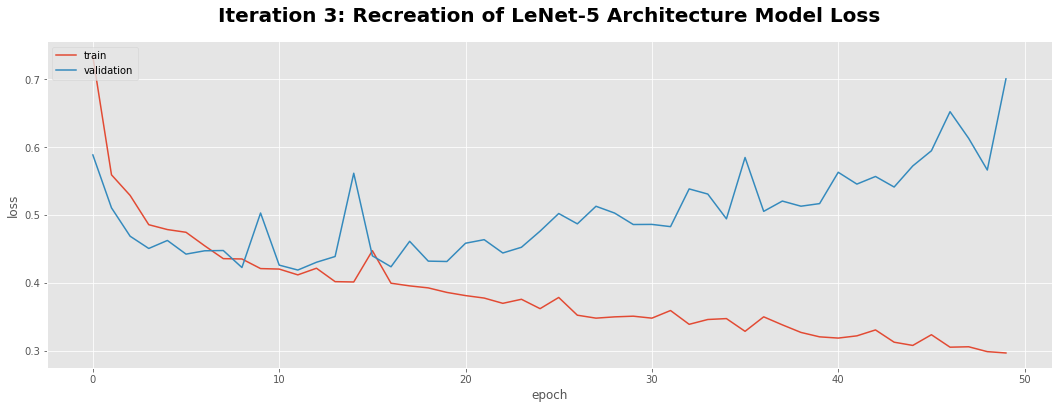

In [197]:
plt.plot(history_LeNet5.history['loss'])
plt.plot(history_LeNet5.history['val_loss'])
plt.title("Iteration 3: Recreation of LeNet-5 Architecture Model Loss", 
          loc= 'center',
          fontsize = 20,
          fontweight = 'bold',
          pad = 20, 
          color = 'black')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [198]:
loss, accuracy = LeNet_5.evaluate(X_test, y_test)
print('Loss: ', loss)
print('Accuracy: ', accuracy)

21/21 [==============================] - 0s 11ms/step - loss: 0.6548 - accuracy: 0.8142
Loss:  0.6547878384590149
Accuracy:  0.8141822814941406


In [199]:
y_pred = np.argmax(LeNet_5.predict(X_test), axis=1)
y_test2 = np.argmax(y_test, axis = 1)
round(accuracy_score(y_pred,y_test2),4)

0.7189

In [200]:
y_pred = np.argmax(LeNet_5.predict(X_test), axis=1)
y_test2 = np.argmax(y_test, axis = 1)
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.51      0.57       221
           1       0.51      0.59      0.55       176
           2       0.91      1.00      0.96       247

    accuracy                           0.72       644
   macro avg       0.69      0.70      0.69       644
weighted avg       0.72      0.72      0.71       644



## Final Predictions: Dataset of (Un)Familiar Faces

- highlight how you have compiled dataset with some close people in your life
- Introduce them in the current setting
- make predictive model
- 

In [218]:
image_classes

['cat', 'dog', 'person']

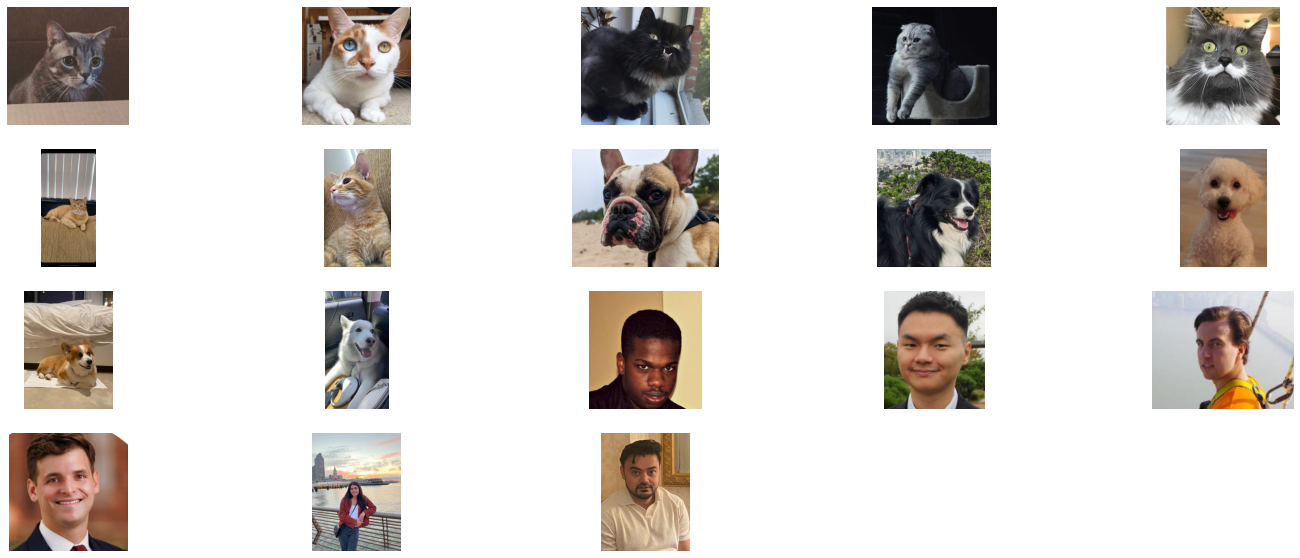

In [229]:
next_dog_pic = ['{}/prediction_images/dog/{}'.format(dir,path) for path in os.listdir('{}/prediction_images/dog'.format(dir))]
next_cat_pic = ['{}/prediction_images/cat/{}'.format(dir,path) for path in os.listdir('{}/prediction_images/cat'.format(dir))]
next_person_pic = ['{}/prediction_images/person/{}'.format(dir,path) for path in os.listdir('{}/prediction_images/person'.format(dir))]
# next_animal_pic = next_dog_pic + next_cat_pic

plt.figure(figsize=(25,10))
for i, img_path in enumerate(next_cat_pic + next_dog_pic + next_person_pic):
    ax = plt.subplot(4, 5, i+1)
    ax.axis('off')
    img = plt.imread(img_path)
    
    plt.imshow(img)

In [226]:
# CNN_basic.predict_proba(ImageProcessor(next_person_pic[1]))